# Akil Bhuiyan


<br>

---



<br>


***```Data Sets:```***

The data set you will be using is comprised of information on
more than 12,700 wines, with many of the attributes being related to the chemical composition of the wines. This data set contains 12795 rows and 16 attributes with the int and float datatypes.


![Data](https://drive.google.com/uc?export=view&id=1a6MJjxMjJLed4z8MgAKOulPhUGyXMgen)
<br>

***```Attributes:```*** 



    Index - Unique identifier for the wines.

    Target - Indicates the number of wine sold.

    AcidIndex - Measures the total acidity of the wine via a weighted average.
    
    Alcohol - The alcohol content of the wine.
    
    Chlorides - The chloride content of the wine.
    
    CitricAcid - The citric Acid content of the wine.
    
    Density - The density of the wine.
    
    FixedAcidity-The fixed Acidity of the wine.
    
    FreeSulfurDioxide - The sulfur Dioxide content of the wine.
    
    LabelAppeal - The marketing score that indicates the appeal of the design of the label on the bottle, this is subjective.
    
    ResidualSugar - The residual sugar content of the wine.
    
    Stars - Wine rating by wine experts. (4 being the highest 1 being the poorest)
    
    Sulphates - The sulfate content of the wine.
    
    TotalSulfurDioxide - Total sulfur dioxide content of the wine.
    
    VolatileAcidity - The volatile acid of the wine.
    
    pH - pH of the wine.
 

The idea of this analysis is to understand the wine data columns, Perform basic data checks, Perform relation analysis by graphical approach, Clean the data, and Check the relations after cleaning. The dataset specifies the quality of wine, given a list of attributes. The attributes are fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulfates, alcohol, and type (0 for red wine, 1 for white wine). These attributes are also known as the feature sets of a dataset. Along with these features, we have a label for each entry of the data, the quality of the wine which is basically a score between 0 and 10.


## **Introduction**

In [ ]:
# All imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline # useful

UsageError: unrecognized arguments: # useful


In [ ]:
csvv = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR0bKfeCK3AkUUsCCPNieQg9aXA9W-j--4wyBcbTuU4ihPplk4qIB9RG1jOEqlfep0jtTMfws8PLIpt/pub?gid=796249808&single=true&output=csv'
csvv = 'https://raw.githubusercontent.com/iakil/CSCI381_DataScience/main/Data/Q3Data.csv'
csvv = 'https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv' 
df = pd.read_csv(csvv)
df.head() 

INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0      1       3           3.2            1.160       -0.98           54.2   
1      2       3           4.5            0.160       -0.81           26.1   
2      4       5           7.1            2.640       -0.88           14.8   
3      5       3           5.7            0.385        0.04           18.8   
4      6       4           8.0            0.330       -1.26            9.4   

   Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density    pH  Sulphates  \
0     -0.567                NaN               268.0  0.99280  3.33      -0.59   
1     -0.425               15.0              -327.0  1.02792  3.38       0.70   
2      0.037              214.0               142.0  0.99518  3.12       0.48   
3     -0.425               22.0               115.0  0.99640  2.24       1.83   
4        NaN             -167.0               108.0  0.99457  3.12       1.77   

   Alcohol  LabelAppeal  AcidIndex  STARS  
0      9.9            0          8    2.0  
1      NaN           -1          7    3.0  
2     22.0           -1          8    3.0  
3      6.2           -1          6    1.0  
4     13.7            0          9    2.0

In [ ]:
df.shape

(12795, 16)

The data types of each attribute

In [ ]:
df.dtypes

INDEX                   int64
TARGET                  int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
STARS                 float64
dtype: object

In [ ]:
df.describe()

INDEX        TARGET  FixedAcidity  VolatileAcidity  \
count  12795.000000  12795.000000  12795.000000     12795.000000   
mean    8069.980305      3.029074      7.075717         0.324104   
std     4656.905107      1.926368      6.317643         0.784014   
min        1.000000      0.000000    -18.100000        -2.790000   
25%     4037.500000      2.000000      5.200000         0.130000   
50%     8110.000000      3.000000      6.900000         0.280000   
75%    12106.500000      4.000000      9.500000         0.640000   
max    16129.000000      8.000000     34.400000         3.680000   

         CitricAcid  ResidualSugar     Chlorides  FreeSulfurDioxide  \
count  12795.000000   12179.000000  12157.000000       12148.000000   
mean       0.308413       5.418733      0.054822          30.845571   
std        0.862080      33.749379      0.318467         148.714558   
min       -3.240000    -127.800000     -1.171000        -555.000000   
25%        0.030000      -2.000000     -0.031000           0.000000   
50%        0.310000       3.900000      0.046000          30.000000   
75%        0.580000      15.900000      0.153000          70.000000   
max        3.860000     141.150000      1.351000         623.000000   

       TotalSulfurDioxide       Density            pH     Sulphates  \
count        12113.000000  12795.000000  12400.000000  11585.000000   
mean           120.714233      0.994203      3.207628      0.527112   
std            231.913211      0.026538      0.679687      0.932129   
min           -823.000000      0.888090      0.480000     -3.130000   
25%             27.000000      0.987720      2.960000      0.280000   
50%            123.000000      0.994490      3.200000      0.500000   
75%            208.000000      1.000515      3.470000      0.860000   
max           1057.000000      1.099240      6.130000      4.240000   

            Alcohol   LabelAppeal     AcidIndex        STARS  
count  12142.000000  12795.000000  12795.000000  9436.000000  
mean      10.489236     -0.009066      7.772724     2.041755  
std        3.727819      0.891089      1.323926     0.902540  
min       -4.700000     -2.000000      4.000000     1.000000  
25%        9.000000     -1.000000      7.000000     1.000000  
50%       10.400000      0.000000      8.000000     2.000000  
75%       12.400000      1.000000      8.000000     3.000000  
max       26.500000      2.000000     17.000000     4.000000

In [98]:
df.nunique()

INDEX                 12795
TARGET                    9
FixedAcidity            313
VolatileAcidity         510
CitricAcid              347
ResidualSugar          1342
Chlorides               996
FreeSulfurDioxide       617
TotalSulfurDioxide      858
Density                5933
pH                      497
Sulphates               382
Alcohol                 361
LabelAppeal               3
STARS                     4
dtype: int64

In [99]:
df.tail()

INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  \
12790  16120       0           5.0             0.79        2.01   
12791  16123       5           8.9             0.47        0.29   
12792  16127       4           6.0             0.17        1.10   
12793  16128       3           7.7             0.32        0.12   
12794  16129       4           5.2             0.04        0.81   

       ResidualSugar  Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  \
12790            5.0      0.043               17.0               101.0   
12791           84.9      0.259               54.0                 NaN   
12792           37.0      0.078               25.0               108.0   
12793            NaN      0.029               26.0               274.0   
12794           52.7        NaN              106.0               242.0   

       Density    pH  Sulphates  Alcohol  LabelAppeal  STARS  
12790  1.01077  3.39       0.57      4.9            1    NaN  
12791  0.99518  4.46       1.20      NaN            1    2.0  
12792  0.99076  3.25        NaN     12.3            0    2.0  
12793  0.99060  3.97       0.62     11.0            1    2.0  
12794  0.99454  3.94       0.12      9.9            0    2.0

Check if there contains any null fields

In [ ]:
df.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

Make all the values positive

In [ ]:
dfPos = abs(df)
dfPos

INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  \
0          1       3           3.2            1.160        0.98   
1          2       3           4.5            0.160        0.81   
2          4       5           7.1            2.640        0.88   
3          5       3           5.7            0.385        0.04   
4          6       4           8.0            0.330        1.26   
...      ...     ...           ...              ...         ...   
12790  16120       0           5.0            0.790        2.01   
12791  16123       5           8.9            0.470        0.29   
12792  16127       4           6.0            0.170        1.10   
12793  16128       3           7.7            0.320        0.12   
12794  16129       4           5.2            0.040        0.81   

       ResidualSugar  Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  \
0               54.2      0.567                NaN               268.0   
1               26.1      0.425               15.0               327.0   
2               14.8      0.037              214.0               142.0   
3               18.8      0.425               22.0               115.0   
4                9.4        NaN              167.0               108.0   
...              ...        ...                ...                 ...   
12790            5.0      0.043               17.0               101.0   
12791           84.9      0.259               54.0                 NaN   
12792           37.0      0.078               25.0               108.0   
12793            NaN      0.029               26.0               274.0   
12794           52.7        NaN              106.0               242.0   

       Density    pH  Sulphates  Alcohol  LabelAppeal  AcidIndex  STARS  
0      0.99280  3.33       0.59      9.9            0          8    2.0  
1      1.02792  3.38       0.70      NaN            1          7    3.0  
2      0.99518  3.12       0.48     22.0            1          8    3.0  
3      0.99640  2.24       1.83      6.2            1          6    1.0  
4      0.99457  3.12       1.77     13.7            0          9    2.0  
...        ...   ...        ...      ...          ...        ...    ...  
12790  1.01077  3.39       0.57      4.9            1          5    NaN  
12791  0.99518  4.46       1.20      NaN            1          8    2.0  
12792  0.99076  3.25        NaN     12.3            0          6    2.0  
12793  0.99060  3.97       0.62     11.0            1          6    2.0  
12794  0.99454  3.94       0.12      9.9            0          7    2.0  

[12795 rows x 16 columns]

In [ ]:
df.drop('AcidIndex',1,inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


## **Exploratory Data Analysis (EDA)**

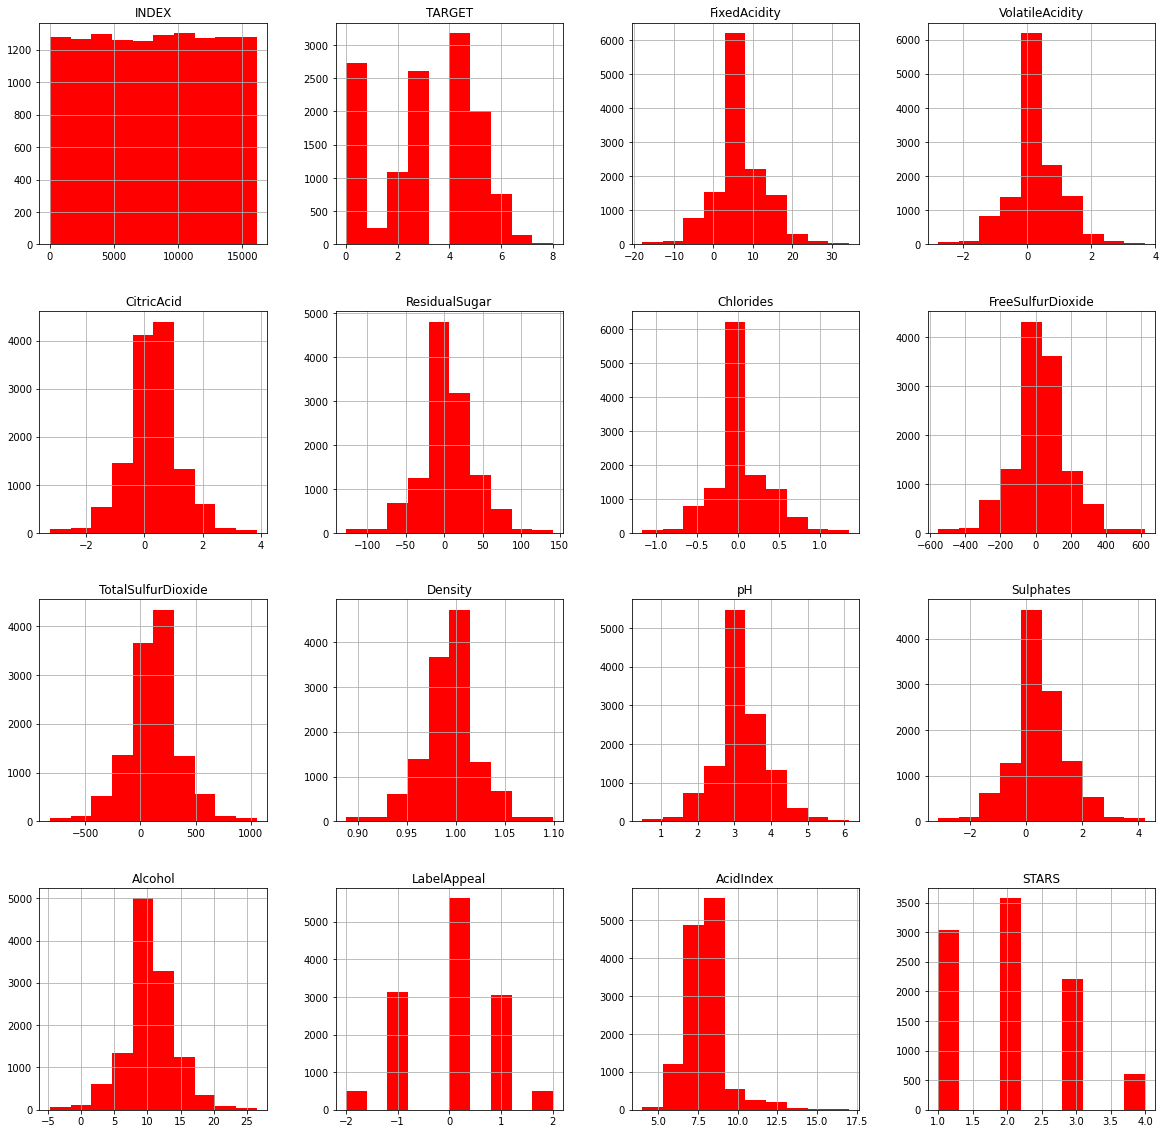

In [ ]:
df.hist(figsize=(20,20), color='red')
plt.show()

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


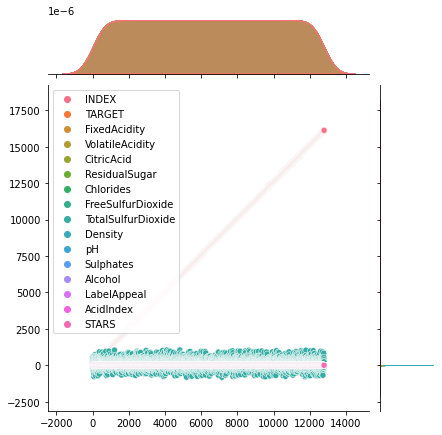

In [ ]:
sns.jointplot(data = df, kind='scatter')

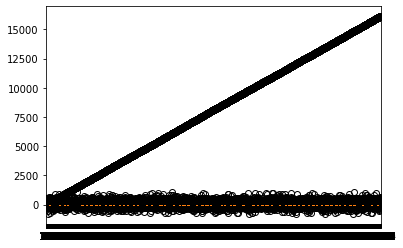

In [ ]:
plt.boxplot(df)
plt.show()

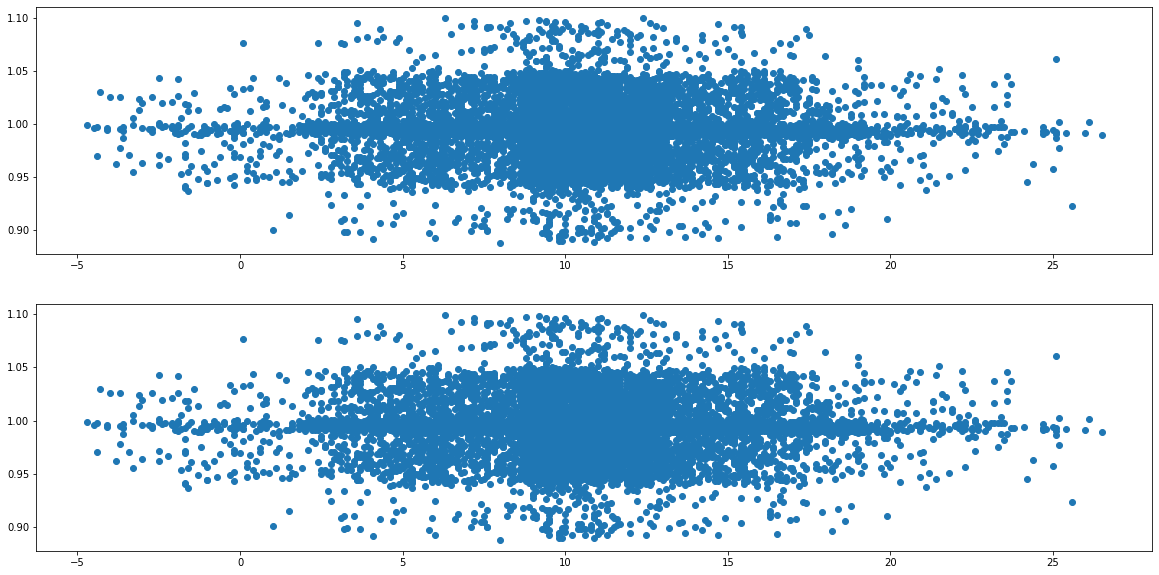

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.scatter(df['Alcohol'],df['Density'])
plt.subplot(2,1,2)
plt.scatter(df['Alcohol'],df['Density'])
plt.show()

This shows the alcohols has the maximum correlation with quality followed by sulphates and citric acid and then fixed acidity.

<Figure size 432x288 with 0 Axes>

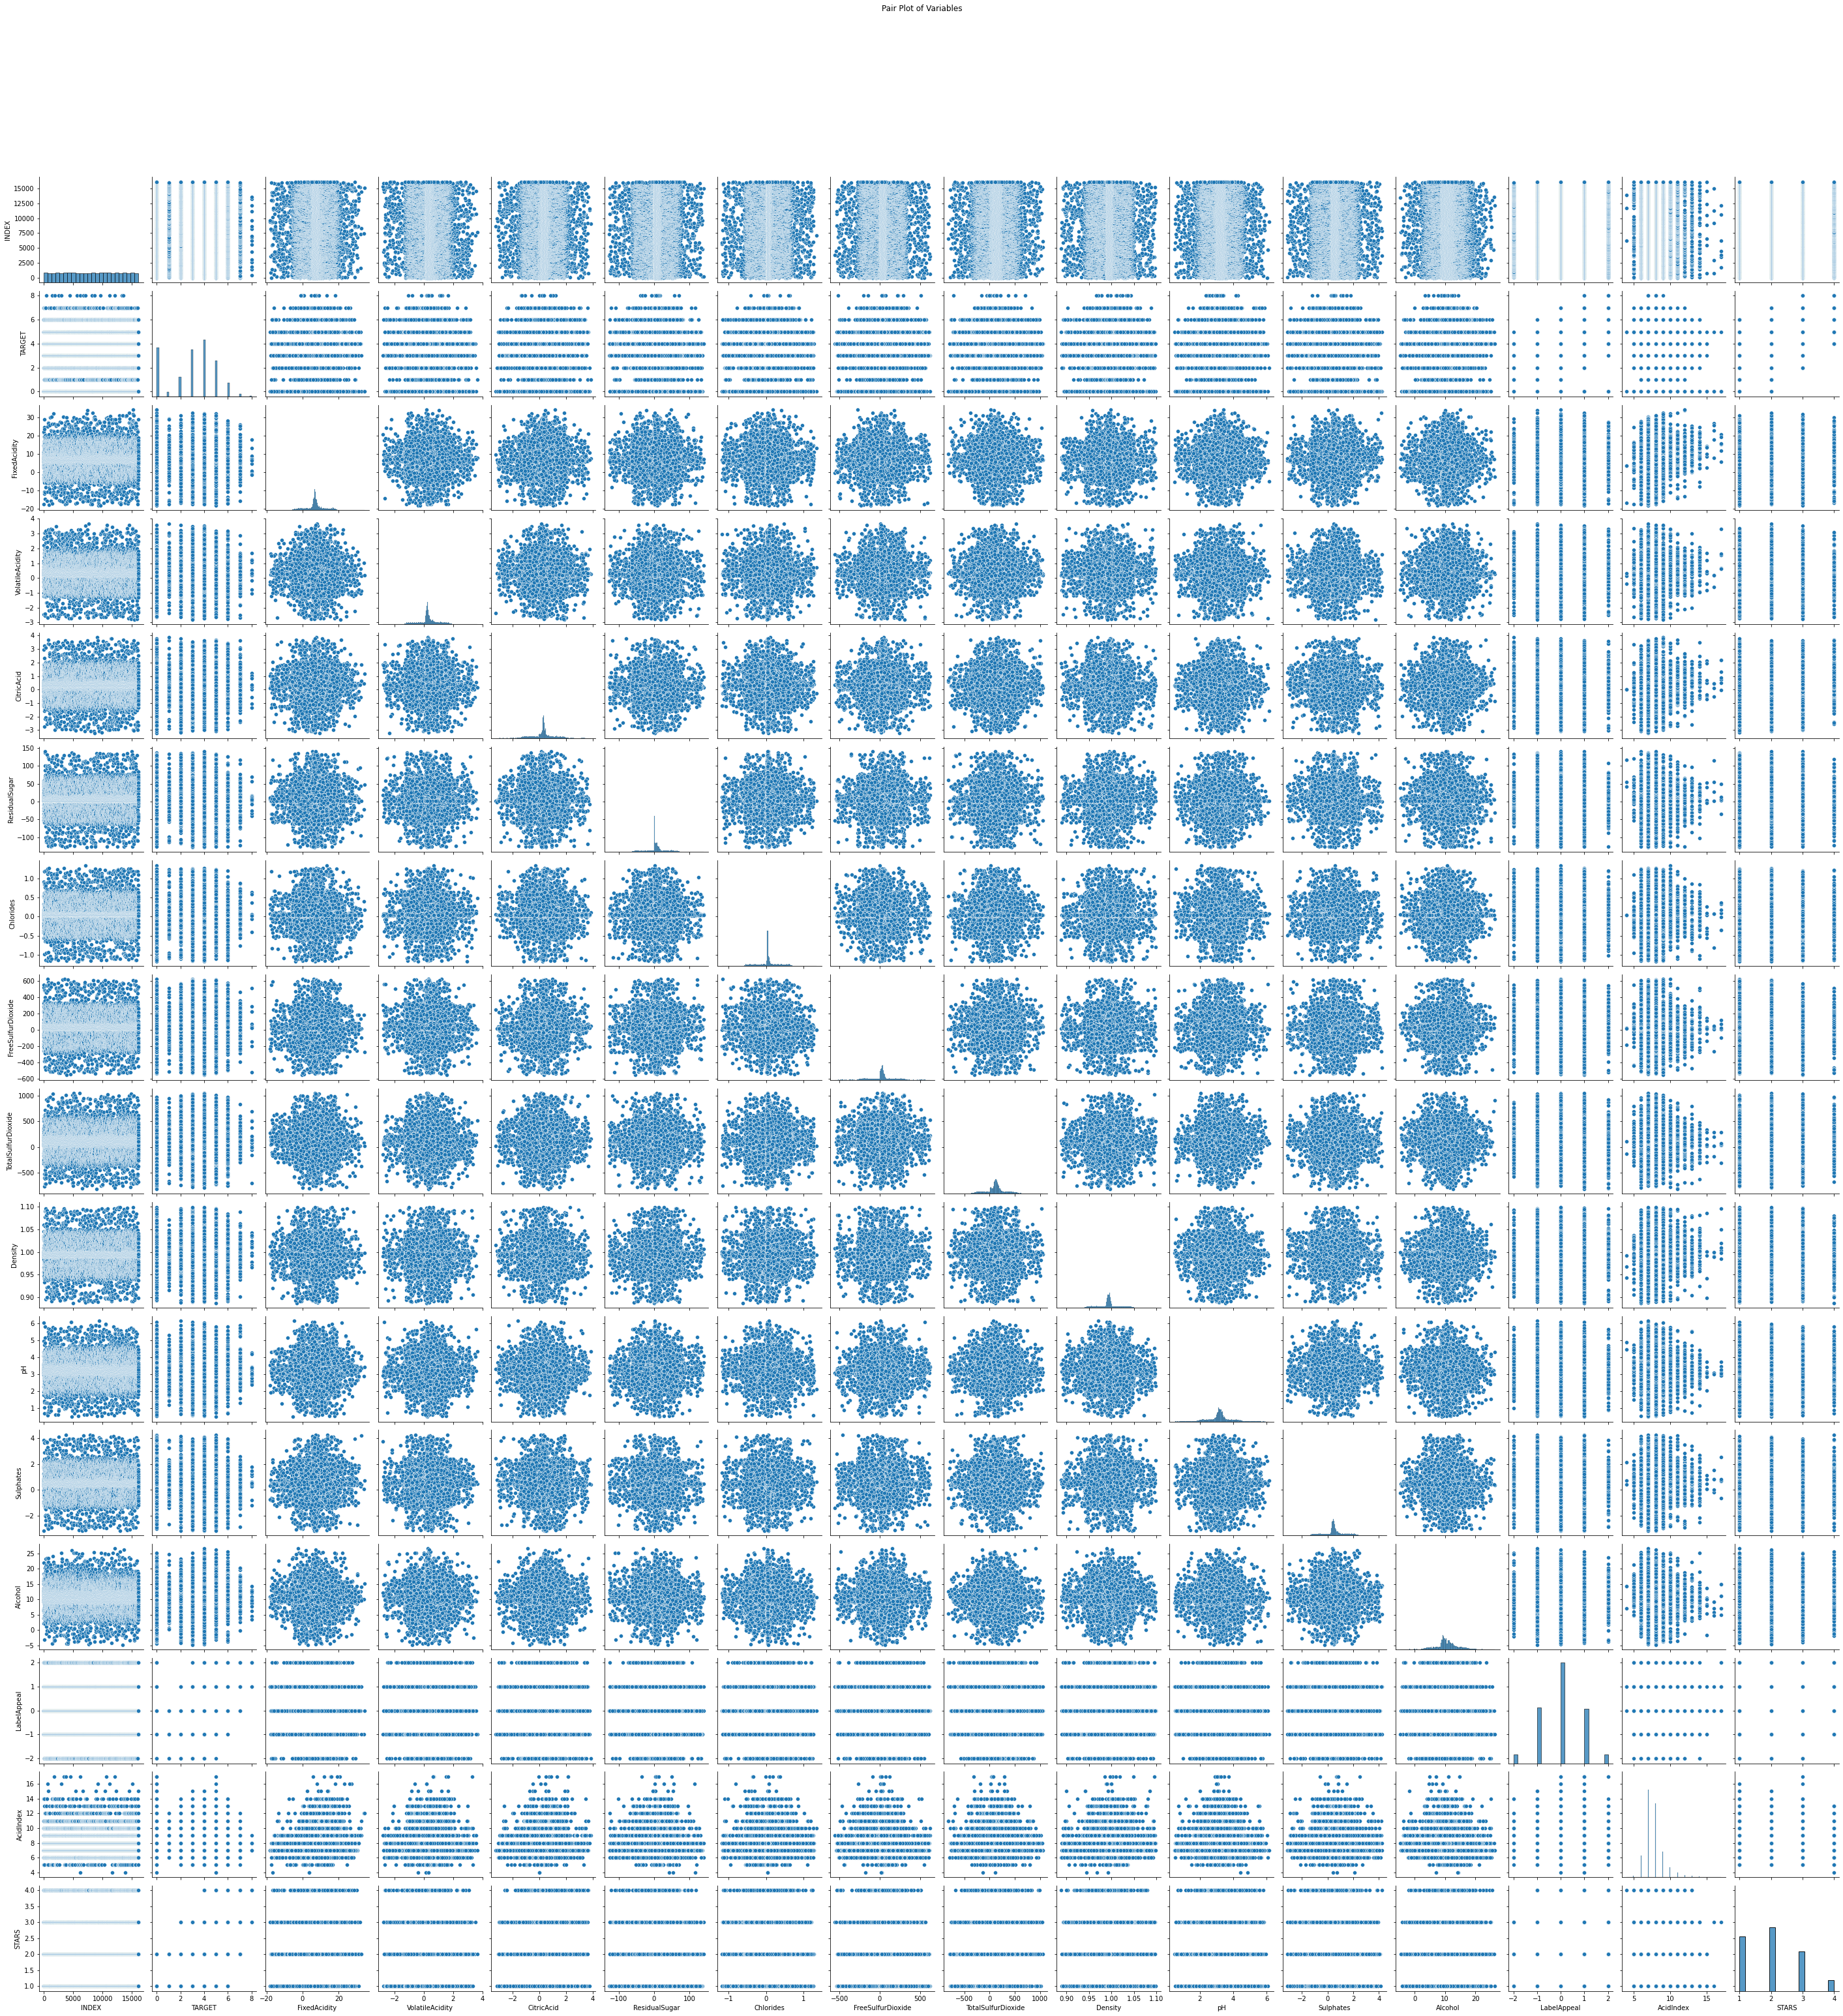

In [ ]:

figure = plt.figure() 
x = sns.pairplot(df) 
x.fig.suptitle(x = "Pair Plot of Variables", y=1.08)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


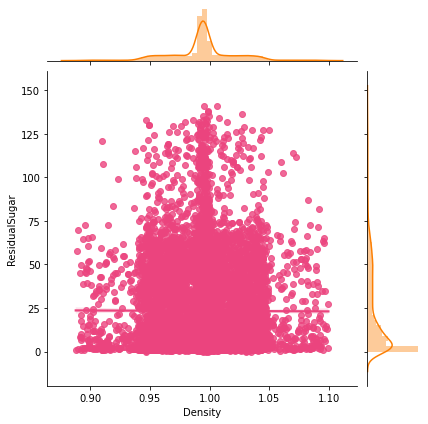

In [ ]:
g = sns.JointGrid(x='Density', y='ResidualSugar', data=df)
g = g.plot_joint(sns.regplot, color='#eb447e')
g = g.plot_marginals(sns.distplot, color='#fc7f03')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now

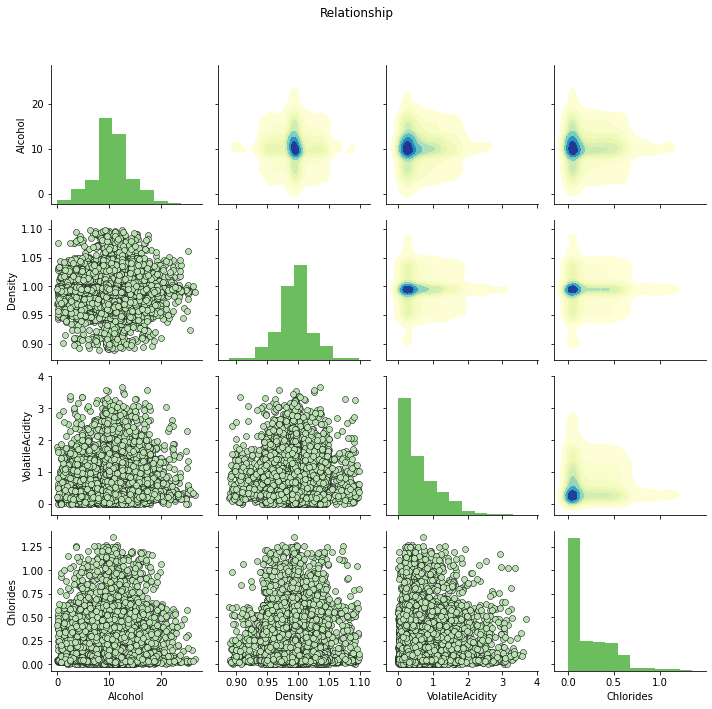

In [ ]:
g = sns.PairGrid(df[['Alcohol','Density','VolatileAcidity','Chlorides']])
g = g.map_upper(sns.kdeplot, cmap='YlGnBu', shade=True, shade_lowest=False)
g = g.map_diag(plt.hist, color='#6cbd5e')
g = g.map_lower(sns.scatterplot, color='#b8e0b1', edgecolor='k')

g.fig.tight_layout()
g.fig.suptitle('Relationship')
plt.subplots_adjust(top=0.9)

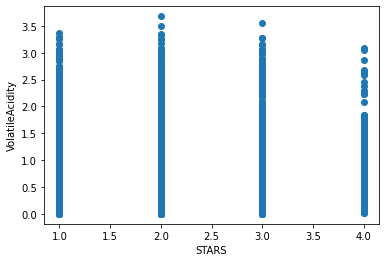

In [95]:
plt.scatter(df['STARS'],df['VolatileAcidity'])
plt.xlabel('STARS')
plt.ylabel('VolatileAcidity')
plt.show()

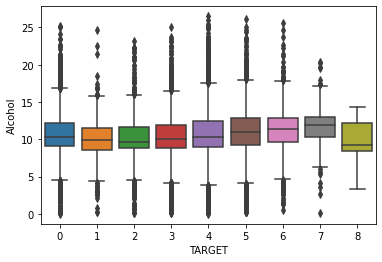

In [97]:
sns.boxplot(x= 'TARGET' , y='Alcohol', data=df)

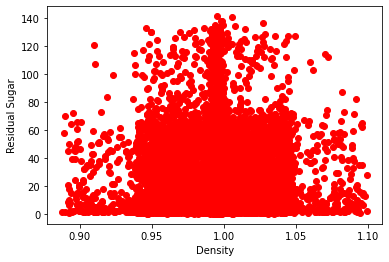

In [103]:
plt.scatter(df['Density'],df['ResidualSugar'], color = 'r')
plt.xlabel('Density')
plt.ylabel('Residual Sugar')
plt.show()

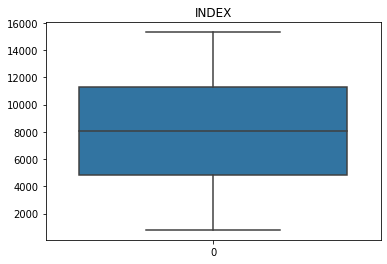

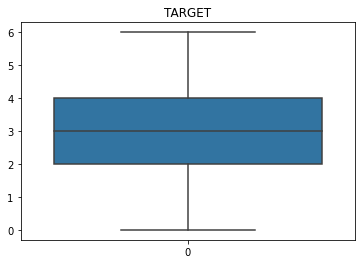

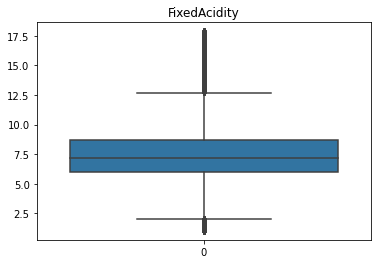

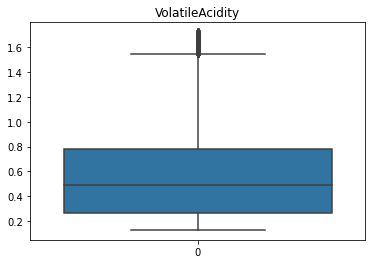

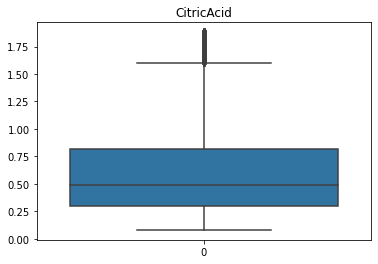

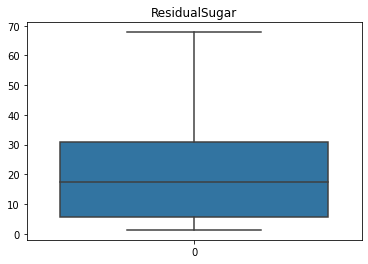

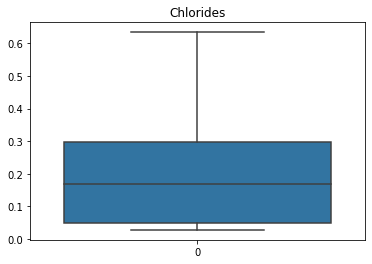

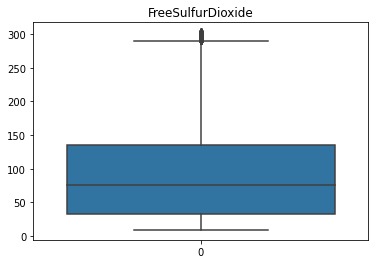

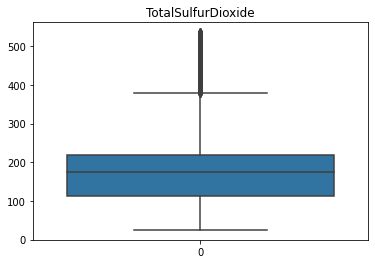

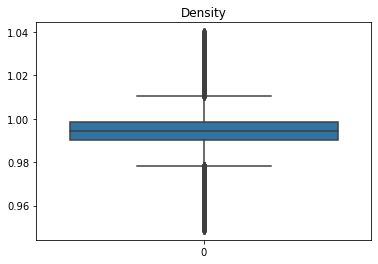

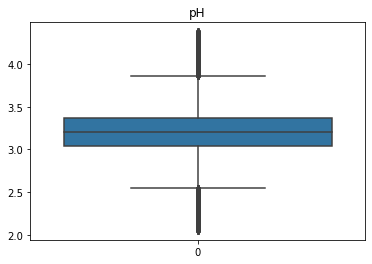

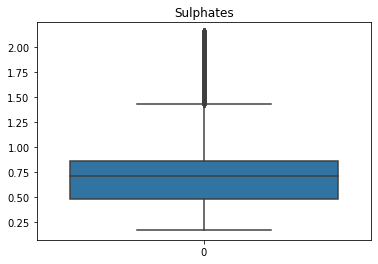

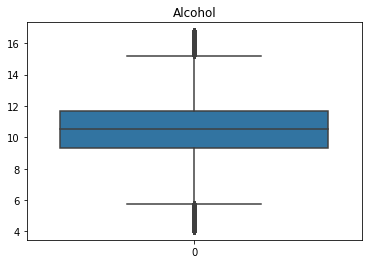

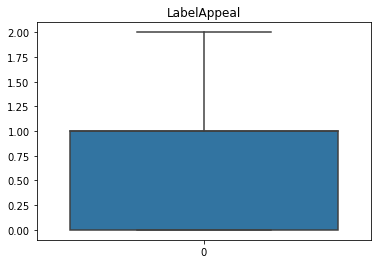

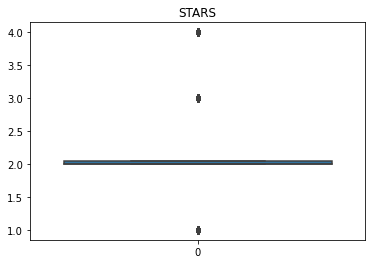

In [107]:
for i in df.columns:
    sns.boxplot(data= df[i])
    plt.title(i)
    plt.show()

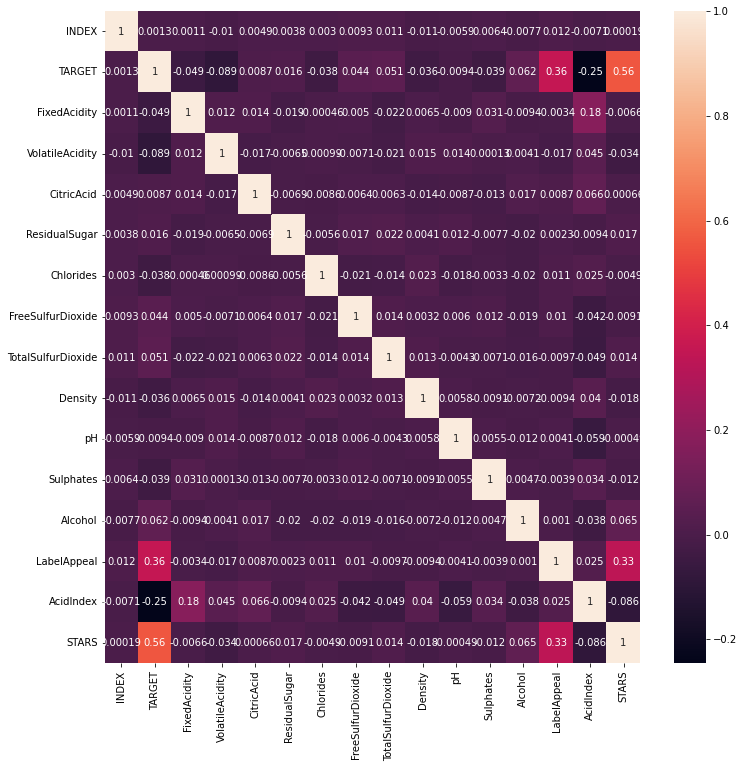

In [ ]:
cor = df.corr()
plt.subplots(figsize=(12,12)) #INCREASE HEATMAP SIZE
sns.heatmap(cor,annot=True)

It shows the correlations between each pair of features in heatmap style. We can observe that residual sugar has a noticeable positive correlation with density. Also total sulfur dioxide is strongly correlated with the type of wine.

## **Data Preparation**

In order to get rid of the extreme outliers, reshape the dataframe and 
drop rows below 1% and above 99% quantile.

In [ ]:
corrected_melt = pd.melt(df, id_vars=['Target','FixedAcidity'], value_vars=df.columns[:11], var_name='variable', value_name='value')
corrected_melt.sort_values(by=['variable','quality'], ascending=[True,True], inplace=True)
corrected_melt.reset_index(drop=True, inplace=True)
corrected_melt.quality = df.quality.astype('str')
corrected_melt.quality = df.quality.astype('category')
corrected_melt.head(3)

In [ ]:
x= df.loc[:,['Chlorides','pH']]
y= df.loc[:,'STARS']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(max_depth=5,min_samples_leaf= 20)
dt.fit(xtrain,ytrain)
dt.score(xtest,ytest)

In [ ]:
from sklearn.linear_model import LogisticRegression
l= LogisticRegression()
l.fit(xtrain,ytrain)
l.score(xtest,ytest)

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)
svc.score(xtrain,ytrain)

In [ ]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score(svc,xtest,ytest,cv=10, scoring='accuracy')
cvs.mean()

In [ ]:
cvs.std()

In [ ]:
cvs= cross_val_score(rf,xtest,ytest,cv=10, scoring='accuracy')
cvs.mean()

In [105]:
out=df.describe(percentiles=[0.05,0.95])
for i in out.columns:
    print(df[i].quantile([0.05,.95]))

0.05      804.7
0.95    15309.3
Name: INDEX, dtype: float64
0.05    0.0
0.95    6.0
Name: TARGET, dtype: float64
0.05     1.1
0.95    17.8
Name: FixedAcidity, dtype: float64
0.05    0.13
0.95    1.72
Name: VolatileAcidity, dtype: float64
0.05    0.08
0.95    1.88
Name: CitricAcid, dtype: float64
0.05     1.3
0.95    67.8
Name: ResidualSugar, dtype: float64
0.05    0.0280
0.95    0.6342
Name: Chlorides, dtype: float64
0.05      9.0
0.95    303.0
Name: FreeSulfurDioxide, dtype: float64
0.05     25.0
0.95    536.0
Name: TotalSulfurDioxide, dtype: float64
0.05    0.948794
0.95    1.039779
Name: Density, dtype: float64
0.05    2.06
0.95    4.37
Name: pH, dtype: float64
0.05    0.17
0.95    2.15
Name: Sulphates, dtype: float64
0.05     4.1
0.95    16.7
Name: Alcohol, dtype: float64
0.05    0.0
0.95    2.0
Name: LabelAppeal, dtype: float64
0.05    1.0
0.95    4.0
Name: STARS, dtype: float64


My data  capped them between 5 and 95 th quantile and imputed them with mean value. Outlier treating with capping and imputing.

In [106]:
for i in out.columns:
    fun= (lambda x: x if x>=out.loc['5%',i] and x<=out.loc['95%',i] else df[i].mean() )
    df[i]= df[i].apply(fun)
df.describe()

INDEX        TARGET  FixedAcidity  VolatileAcidity  \
count  12795.000000  12795.000000  12795.000000     12795.000000   
mean    8070.511746      2.978400      7.779403         0.590623   
std     3975.448897      1.870957      3.607659         0.392897   
min      805.000000      0.000000      1.100000         0.130000   
25%     4829.500000      2.000000      6.000000         0.270000   
50%     8069.980305      3.000000      7.200000         0.490000   
75%    11282.500000      4.000000      8.700000         0.780000   
max    15309.000000      6.000000     17.800000         1.720000   

         CitricAcid  ResidualSugar     Chlorides  FreeSulfurDioxide  \
count  12795.000000   12795.000000  12795.000000       12795.000000   
mean       0.631728      21.109098      0.200593          97.234501   
std        0.429075      17.915849      0.167972          76.643690   
min        0.080000       1.300000      0.028000           9.000000   
25%        0.300000       5.700000      0.050000          33.000000   
50%        0.490000      17.300000      0.169000          76.000000   
75%        0.820000      31.000000      0.296000         136.000000   
max        1.880000      67.800000      0.634000         303.000000   

       TotalSulfurDioxide       Density            pH     Sulphates  \
count         12795.00000  12795.000000  12795.000000  12795.000000   
mean            191.35475      0.994211      3.206180      0.796314   
std             111.53751      0.017810      0.454433      0.437769   
min              25.00000      0.948800      2.060000      0.170000   
25%             113.00000      0.990360      3.040000      0.480000   
50%             175.00000      0.994203      3.207628      0.710000   
75%             219.75000      0.998350      3.370000      0.860000   
max             536.00000      1.039770      4.370000      2.150000   

            Alcohol   LabelAppeal         STARS  
count  12795.000000  12795.000000  12795.000000  
mean      10.486110      0.638687      2.041755  
std        2.478538      0.621425      0.775058  
min        4.100000      0.000000      1.000000  
25%        9.300000      0.000000      2.000000  
50%       10.523778      1.000000      2.000000  
75%       11.700000      1.000000      2.041755  
max       16.700000      2.000000      4.000000

## **Prepped Data Review**

I applied SelectKBest with chi2 scoring function from sklearn and found that volatile acidity, citric acid, free sulfur dioxide, total sulfur dioxide, and alcohol are the top five features for this dataset. I also applied Recursive Feature Selection using logistic regression and Extra Trees Classifier for finding the best useful features for determining the quality of wines.
Observing the results from feature selection methods, we select alcohol, total sulfur dioxide, sulphates, volatile acidity, density, residual sugar, chlorides, pH, and free sulfur dioxide as features for type 1 wines and alcohol, volatile acidity, density, free sulfur dioxide, total sulfur dioxide, residual sugar, sulphates, and chlorides for type 2 wines.

I found the solution using a regression model since the outcomes range from 3 to 9, as well as classification model since we can define the outcomes as some certain classes. After finding both kinds of models, and find that only tree based classifiers perform well, particularly Extra Trees classifier and Random Forest classifier outperform all other existing kinds of regressors and classifiers. For type 1 wines, Random Forest Classifier gives the best MAE and for type 2 wines, Extra Trees Classifier gives the best MAE. Parameters for both types are given below: number of estimators=500
min samples leaf=1, observed the Cross Validation Mean (CVM) and MAE scores

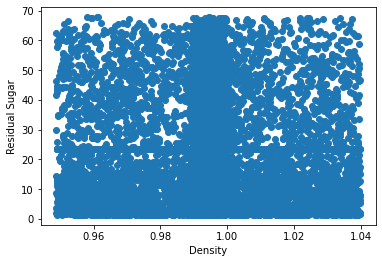

In [130]:
plt.scatter(df['Density'],df['ResidualSugar'])
plt.xlabel('Density')
plt.ylabel('Residual Sugar')
plt.show()

In [112]:
x= df.loc[:,['FixedAcidity', 'VolatileAcidity','ResidualSugar',
       'Chlorides', 'TotalSulfurDioxide','pH', 'Sulphates', 'Alcohol', 'STARS']]
y= df.loc[:,'STARS']

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3, random_state=0)

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
l= LinearRegression()
l.fit(xtrain,ytrain)

LinearRegression()

In [116]:
l.score(xtest,ytest)

1.0

In [119]:
t= DecisionTreeRegressor(max_depth=5,min_samples_leaf= 20)

t.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=20)

In [125]:
t.score(xtest,ytest)

1.0

In [ ]:
cvs= cross_val_score(svc,xtest,ytest,cv=10, scoring='accuracy')
cvs= cross_val_score(r,xtest,ytest,cv=10, scoring='accuracy')
cvs.mean()

## **Conclusion**

We experimented with different types of classification and regression models for this task. The best MAE score we find with this dataset is 0.336819. There are still plenty of scopes to experiment with the data, especially in-depth exploratory data analysis could help understand the data more accurately. Based on our EDA and analysis we see the factor that as alcohol levels increase, Quality increases,
as chlorides level decreases then Quality increases,
as citric acid level increases then Quality increases,
when density decreases then Quality increases,
with fixed acidity can’t say the impact on Quality.
As free sulfur dioxide increases, Quality increases. Similarly for
pH, sulfates, total sulfur dioxide, we can’t say the impact on Quality.
As residual sugar increases that time Quality increases.
As the volatile acidity decreases and Quality increases
But since only below four contributes to wine quality :
alcohol, density, volatile acidity, chlorides. Some other factor we also can come up with is,
An increase in the alcohol qty increases the quality of the wine.
A decrease in the density of the wine increases the quality of the wine.
A decrease in the volatile acidity of the wine increases the quality of the wine.
A decrease in chlorides increases the quality of the wine.


## **Reference**

[Quiz3.pdf](https://drive.google.com/file/d/1ikdPKWl6XU8ieSA9bncVi31iycksebou/view?usp=sharing)

http://sayef.tech/post/eda-on-wine-quality-dataset/ 

https://www.kaggle.com/code/rutwikd95/eda-of-wine-dataset-and-classification-of-wine/notebook

https://medium.com/@shreyasrivastav26/exploratory-data-analysis-on-wine-data-set-46ff17a42cd4

https://www.numpyninja.com/post/introduction-to-exploratory-data-analysis-eda

https://scikit-learn.org

https://en.wikipedia.org/wiki/Exploratory_data_analysis



